<a href="https://colab.research.google.com/github/figureandfacts/Capstone-Project-Airbnb-Analysis/blob/main/EDA_Capstone_Project_Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

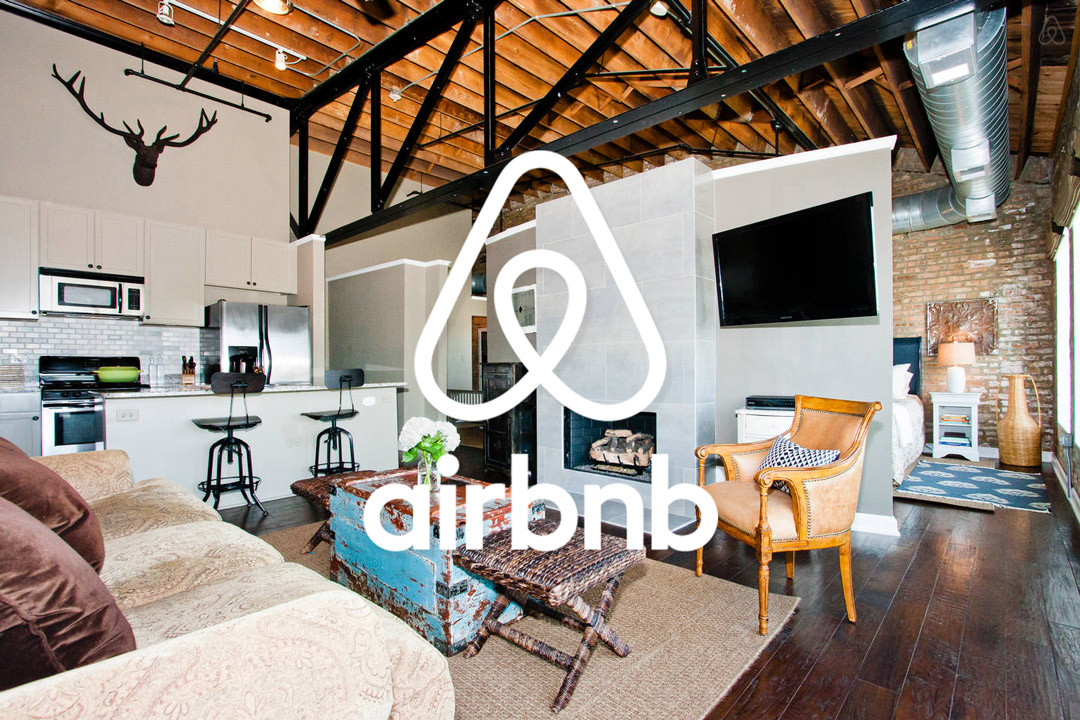

Okay, before going to start. Let's understand what is Airbnb?

Looks Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. 
Wow! This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Looks, somewhat on a same business as OYO but the former doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent.

Well, enough of it we understood what is the data all about and where it came from.

Excited much? Lets deep dive!

Let me include all the soldiers in the battle!

In [3]:
#importing the libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing the dataset

booking_df = pd.read_csv('/content/drive/MyDrive/Airbnb Capstone Project/Airbnb NYC 2019.csv')

#reading the dataset
#.head() automatically shows top 5 rows
booking_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data Exploration and variable Identification:**

In [ ]:
#checking what are the variables here:
booking_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#calculating rows and columns count
print(f'The dataset have {booking_df.shape} columns and rows resp.')

The dataset have (48884, 14) columns and rows resp.


In [ ]:
#basic information about the dataset
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Checking for the null values and null values percentage & Visually representing it
booking_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

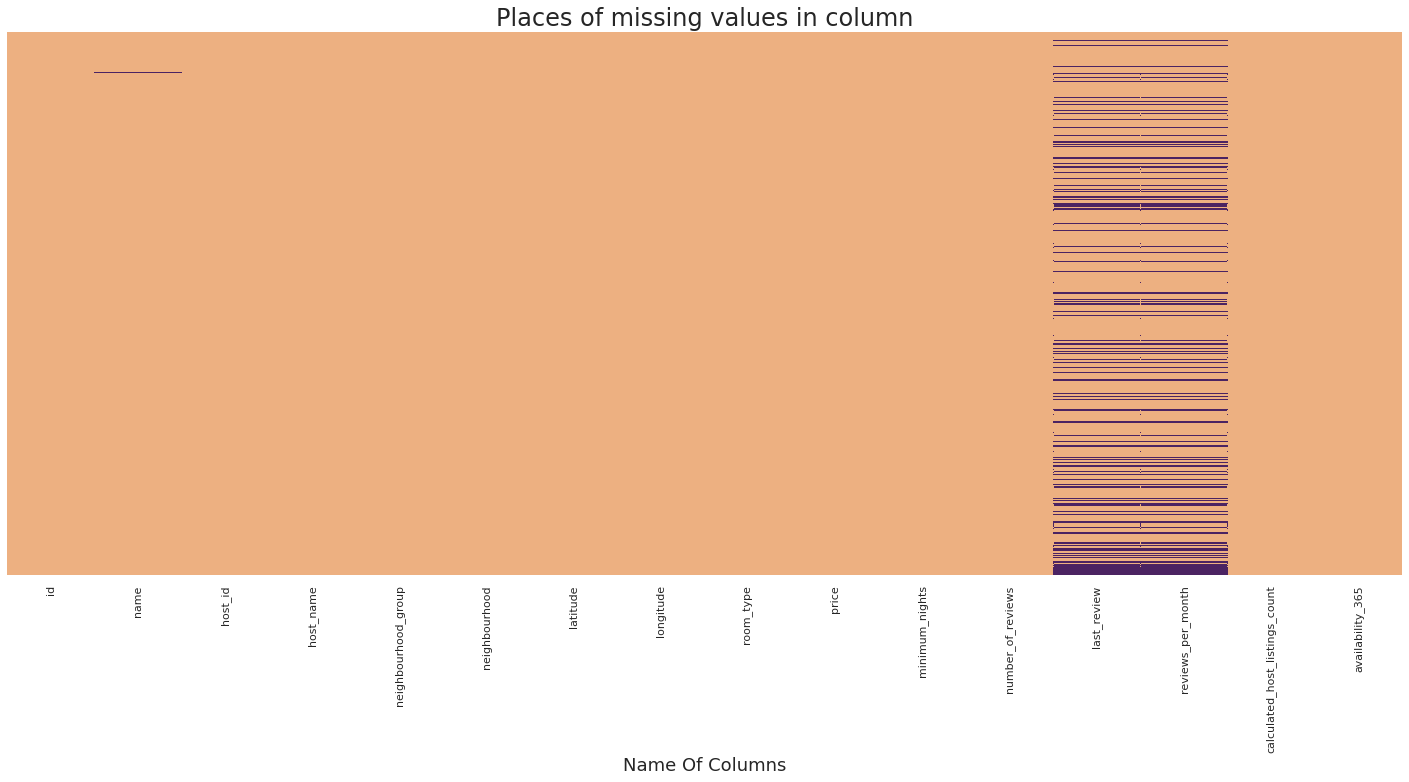

In [ ]:
# visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(booking_df.isnull(), cbar = False, yticklabels = False, cmap = 'flare')
plt.xlabel("Name Of Columns", fontsize = 18)
plt.title("Places of missing values in column", fontsize = 24)
plt.show()

**Observation** :
1. Columns like 'name', 'host_name', 'last_review', 'reviews_per_month' have missing values.
2. Columns like host_name and last_reviews are not important, therefore we can drop these columns.
3. last_review and reviews_per_month columns have NaN and they are connected ,hence when the date is missing in last_review the values in review_per_month is also missing.

# **Cleaning the data and treating the null values**

Either we can drop the null values or we can fill it as per the requirement.
I'm going to drop the ID, host_name and last_review column as it's not needed for this project.

In [ ]:
#dropping columns

booking_df.drop(["host_name" ,"last_review"], inplace = True, axis = 1)

In [ ]:
#replacing the Nan values 

booking_df.fillna({'reviews_per_month' : 0}, inplace = True)
booking_df.fillna({'name' : 'No_Name'}, inplace = True )

In [ ]:
#checking null values again

booking_df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
booking_df.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Observation**

1. The minimum price is zero which is very unlikely. </br>
2. The maximum minimum_nights is 1250 , which is not appropriate.

In [ ]:
#rows which have 'zero' as price
booking_df[booking_df['price'] ==  0]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,the best you can find,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [ ]:
relevant = ['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
booking_df[relevant].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
#excluding the rows with price as 'zero'
booking_df = booking_df.loc[booking_df['price'] > 0 ]
booking_df[relevant].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,7.144628,112.779498
std,240.170260,20.512224,44.551331,32.956185,131.627271
min,10.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


# **EXPLORATORY DATA ANALYSIS**

**From the below correlation matrix 
we come to know that the number_of_reviews and reviews_per_month are highly correlated variables 
as compared to other variable.**

In [6]:
booking_df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


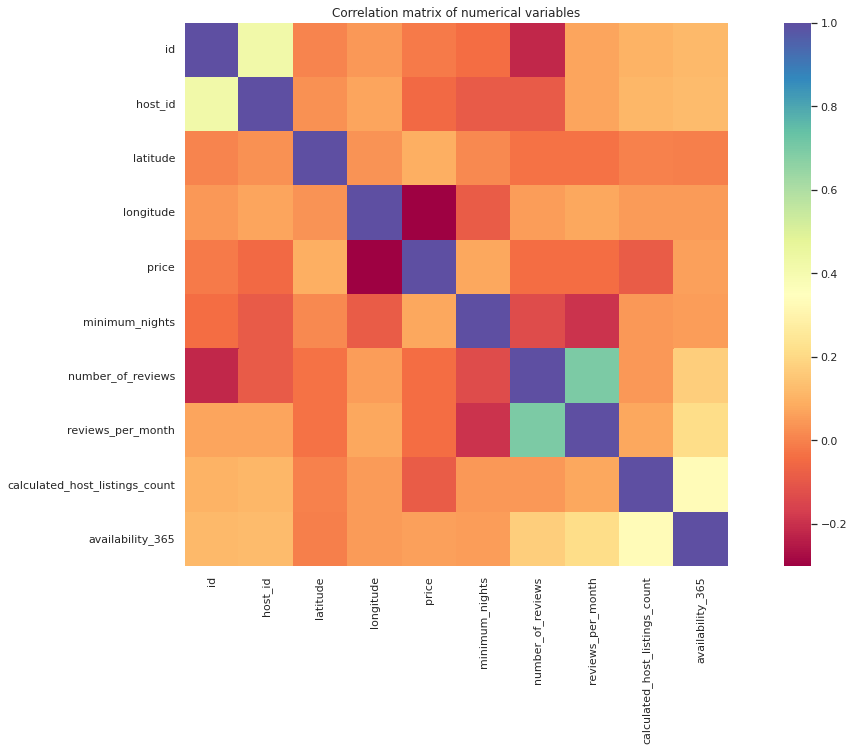

In [ ]:
plt.figure(figsize = (20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(booking_df.corr(method = 'kendall'), cmap = 'Spectral', square = True)
plt.title(title)
plt.show()

#**1. Which 'neighbourhood_group' has the highest number of AirBnb's ?** </br>


In [ ]:
all_neighbourhood_group = booking_df.groupby('neighbourhood_group')['id'].count().reset_index()
all_neighbourhood_group

,neighbourhood_group,id
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


In [ ]:
colors = sns.color_palette('bright')[0:5]

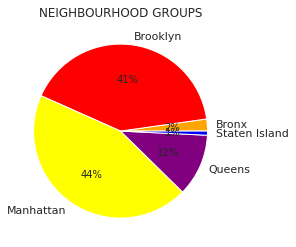

In [ ]:
#plotting on pie chart

plt.pie(all_neighbourhood_group['id'],labels=all_neighbourhood_group['neighbourhood_group'],
        colors = ('orange','red','yellow',"purple","blue"), autopct='%.0f%%')
plt.title("NEIGHBOURHOOD GROUPS")
plt.show()

As we can see from the bar chart above Manhattan neighbourhood has the highest number of AirBnb's

1. Manhattan </br>
2. Brooklyn </br>
3. Queens </br>
4. Bronx </br>
5. Staten Island </br>
And Manhattan and Brooklyn has more than 75% of the AirBnb's.

In [ ]:
#Calculating the precise percentage AirBnb's are there in Manhattan and Brooklyn

neighbourhood = booking_df.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhood = pd.DataFrame(neighbourhood)
neighbourhood.rename(columns = {'neighbourhood_group' : 'No of AirBnbs'}, inplace = True)
neighbourhood

,No of AirBnbs
neighbourhood_group,
Bronx,1090
Brooklyn,20095
Manhattan,21660
Queens,5666
Staten Island,373


In [ ]:
neighbourhood/(sum(neighbourhood['No of AirBnbs'] / 100))

,No of AirBnbs
neighbourhood_group,
Bronx,2.229768
Brooklyn,41.107520
Manhattan,44.308976
Queens,11.590705
Staten Island,0.763031


**Now Precisely we can say 85.41 ~ 86% AirBnb's are there in Manhattan and Brooklyn**

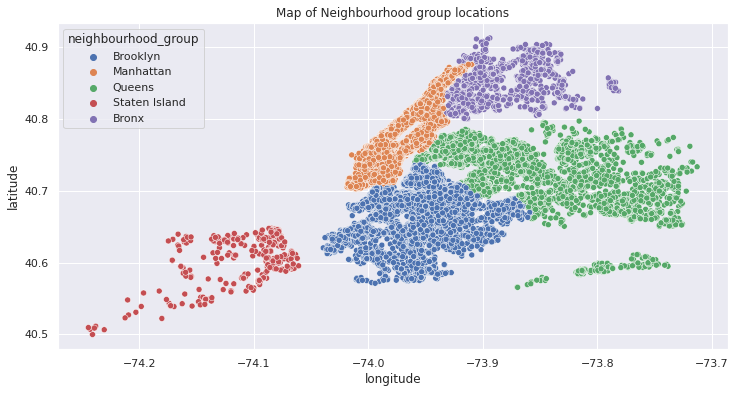

In [ ]:
#scatter plot
title = 'Map of Neighbourhood group locations'
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x = booking_df['longitude'], y = booking_df['latitude'], hue = booking_df['neighbourhood_group']).set_title(title)
plt.show()

# **Type of properties in all the neighbourhood**

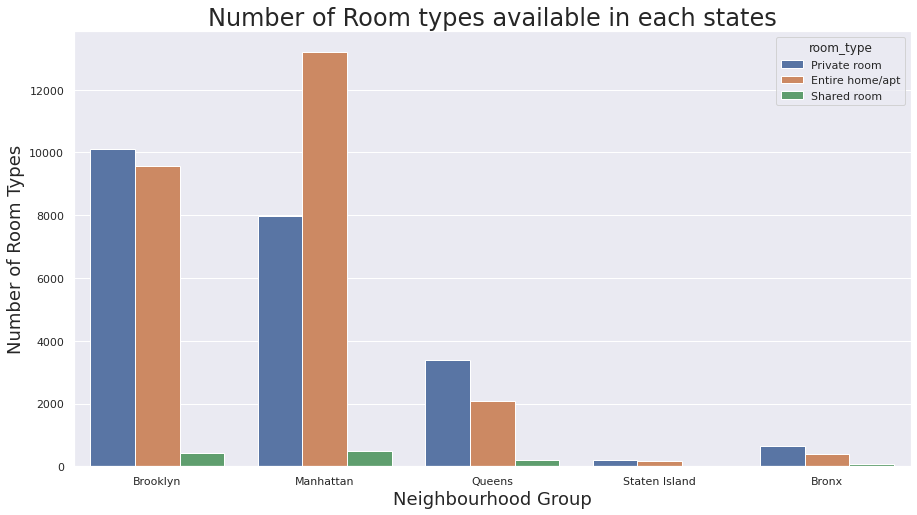

In [ ]:
#plotting the Number of Room types available in each states

plt.figure(figsize = (15,8))
sns.countplot(booking_df['neighbourhood_group'], hue = booking_df['room_type'])
plt.xlabel('Neighbourhood Group', fontsize = 18) 
plt.ylabel('Number of Room Types',fontsize = 18)
plt.title('Number of Room types available in each states',fontsize = 24)
plt.show()

1. Brooklyn has Highest number of Private Rooms </br>

2. Manhattan has Highest number of Entire Home/Apartment </br>

3. Manhattan has Highest number of Shared Room

# **Which properties are the busiest Host in terms of Number of Bookings ?**

In [ ]:
# return which host has the highest bookings

highest_bookings= booking_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

top_ten_highest_bookings= highest_bookings[:10]

top_ten_highest_bookings

,neighbourhood_group,name,Most_Bookings
44566,Queens,Hillside Hotel,18
5258,Brooklyn,Brooklyn Apartment,12
12115,Brooklyn,Loft Suite @ The Box House Hotel,11
2826,Brooklyn,Artsy Private BR in Fort Greene Cumberland,10
34365,Manhattan,No_Name,9
7662,Brooklyn,Cozy Brooklyn Apartment,8
15309,Brooklyn,Private room in Williamsburg,8
3381,Brooklyn,Beautiful Brooklyn Brownstone,8
44602,Queens,Home away from home,8
15266,Brooklyn,Private room in Brooklyn,8


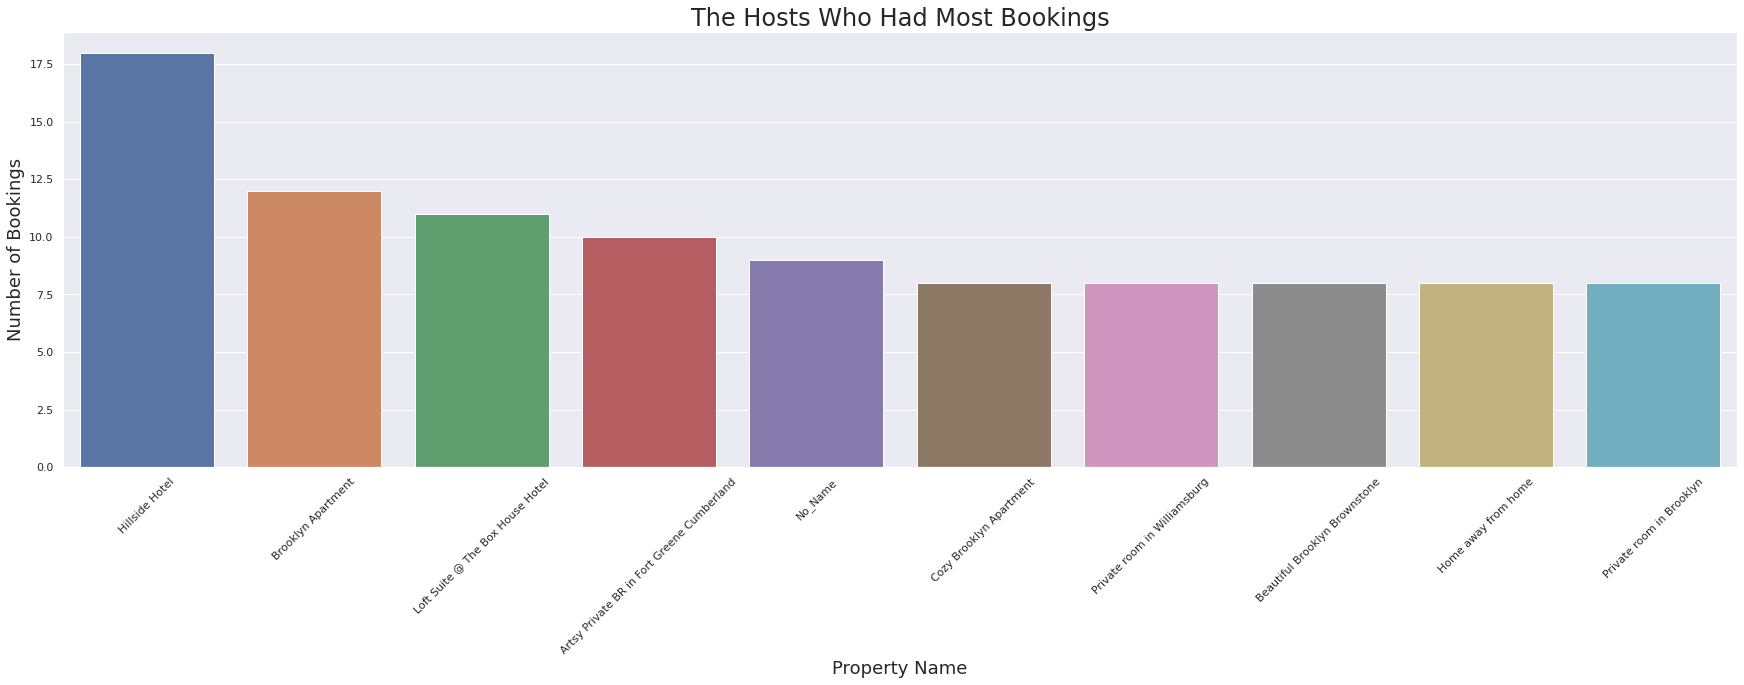

In [ ]:
#Visualizaing the top_ten_highest_bookings

plt.figure(figsize=(30,8))
sns.barplot(x = top_ten_highest_bookings['name'],y = top_ten_highest_bookings['Most_Bookings'])
plt.xlabel('Property Name', fontsize = 18)
plt.xticks(rotation = 45)
#plt.xticks(rotation = 90)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

As we can see from above Hillside Hotel property in Queens had the most number of bookings followed by Brooklyn Apartment in Brooklyn and Loft Suite at Brooklyn.

# **Analysing price with various other factors </br>**

**minimum_nights</br>
no_of_reviews</br>
calculated_host_listings_count</br>
reviews_per_months**

**1. minimum_nights v/s price**

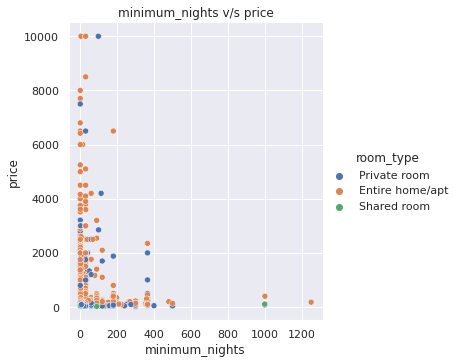

In [ ]:
sns.relplot(x='minimum_nights',y='price',hue='room_type',data=booking_df)
plt.title("minimum_nights v/s price")
plt.show()

**2. no_of_reviews v/s price**

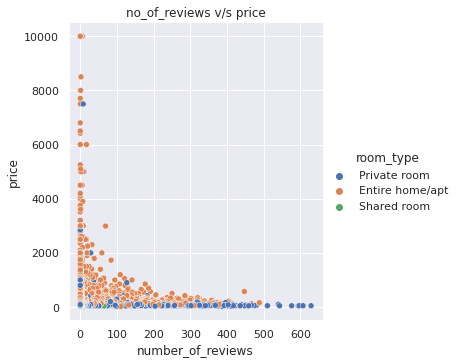

In [ ]:
sns.relplot(x='number_of_reviews',y='price',hue='room_type',data=booking_df)
plt.title('no_of_reviews v/s price')
plt.show()

**3. calculated_host_listings_count v/s price**

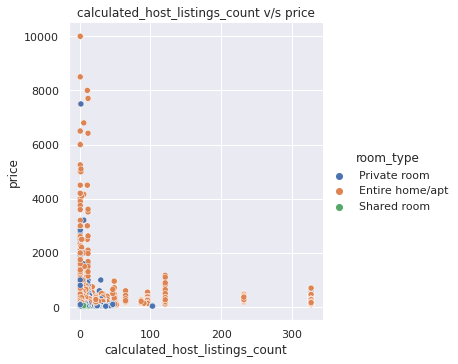

In [ ]:
sns.relplot(x='calculated_host_listings_count',y='price',hue='room_type',data=booking_df)
plt.title("calculated_host_listings_count v/s price")
plt.show()

**4. reviews _per_month v/s price**

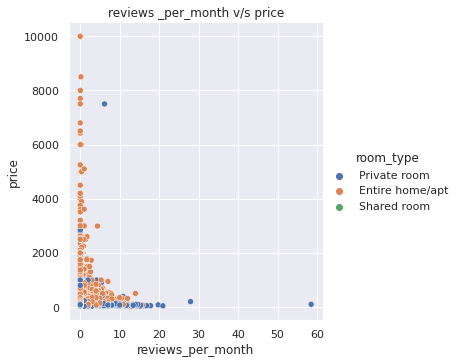

In [ ]:
sns.relplot(x="reviews_per_month",y='price',hue='room_type',data=booking_df)
plt.title('reviews _per_month v/s price')
plt.show()

# **Top 10 expensive neighbourhood based on the average price**

In [ ]:
temp= booking_df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')

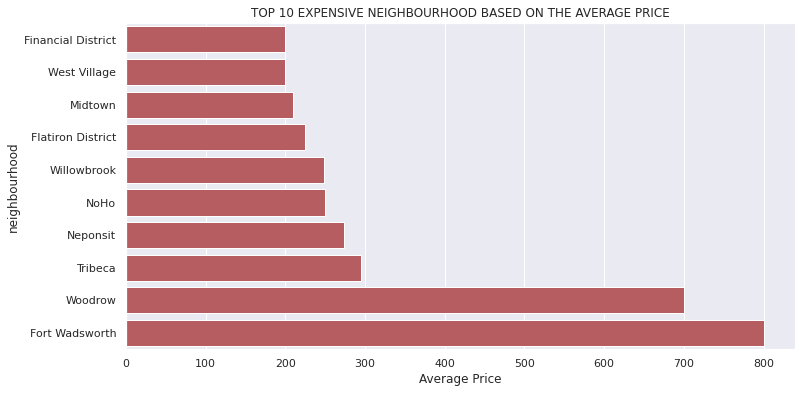

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[-10:],
            label="Total", color='r').set(xlabel='Average Price')
plt.title('TOP 10 EXPENSIVE NEIGHBOURHOOD BASED ON THE AVERAGE PRICE')
plt.show()

# **Top 10 inexpensive neighbourhood based on the average price**

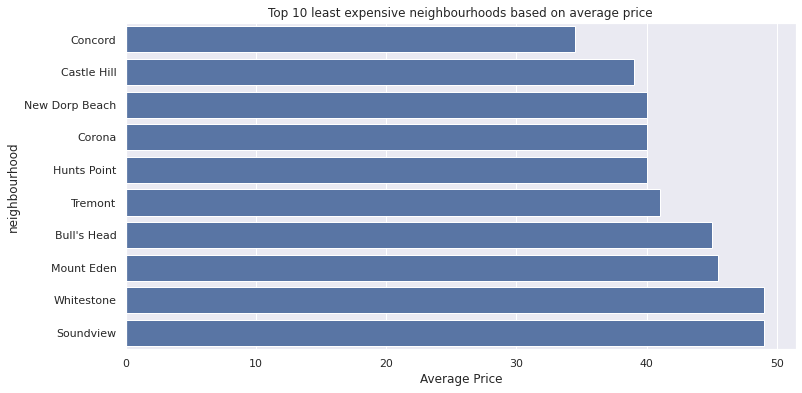

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[:10],
            label="Total", color="b").set(xlabel='Average Price')
plt.title('Top 10 least expensive neighbourhoods based on average price')
plt.show()

# **Most visited properties based on number of reviews**

In [ ]:
booking_df.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10].reset_index().rename(columns={'name': "Property Names" })

,Property Names,number_of_reviews
0,Private Bedroom in Manhattan,666
1,Room near JFK Queen Bed,629
2,Beautiful Bedroom in Manhattan,617
3,Great Bedroom in Manhattan,607
4,Room Near JFK Twin Beds,576
5,Steps away from Laguardia airport,543
6,Manhattan Lux Loft.Like.Love.Lots.Look !,540
7,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
8,Private brownstone studio Brooklyn,488
9,Loft Suite @ The Box House Hotel,481


In [ ]:
most_visited = booking_df.groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]

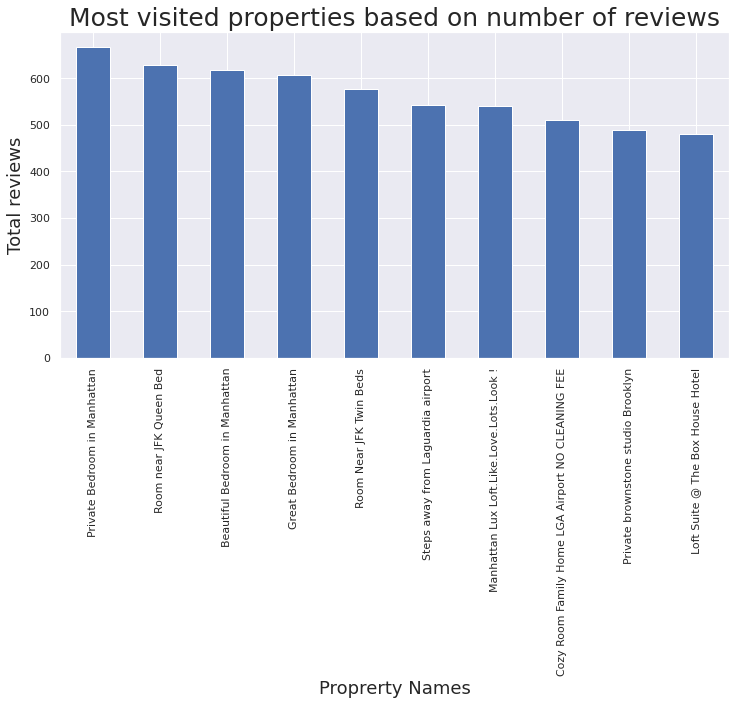

In [ ]:
most_visited.plot(kind='bar')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Most visited properties based on number of reviews', fontsize = 25)
plt.xlabel('Proprerty Names', fontsize = 18)
plt.ylabel('Total reviews', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

Top 3 properties visited by People based on number of reviews are :</br>

1. Private Bedroom in Manhattan</br>

2. Room near JFK Queen Bed</br>

3. Beautiful Bedroom in Manhattan

# **Plot the Airbnb Spatial Data on New York City Map**

In [ ]:
Box = (booking_df.longitude.min(), booking_df.longitude.max(), booking_df.latitude.min(), booking_df.latitude.max())

In [ ]:
new_york_city_map = plt.imread('/content/drive/MyDrive/Airbnb Capstone Project/NYC.png')

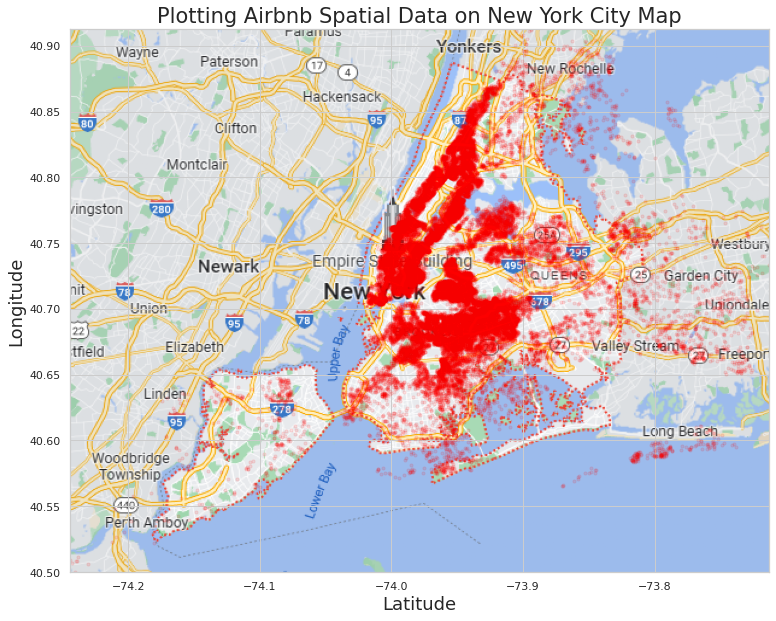

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(booking_df.longitude, booking_df.latitude, zorder=1, alpha= 0.1, c='red', s=10)
ax.set_title('Plotting Airbnb Spatial Data on New York City Map', fontsize = 21)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(new_york_city_map, zorder=0, extent = Box, aspect = 'equal')
plt.show()

The above Map shows all the Airbnb Properties of the dataset in New York City.

# **Plot the 50 Busiest Airbnb properties on the New York City Map**

In [ ]:
Busiest_50_df = booking_df.sort_values('reviews_per_month',ascending=False, inplace=False).head(50)
Busiest_50_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,17.82,3,25


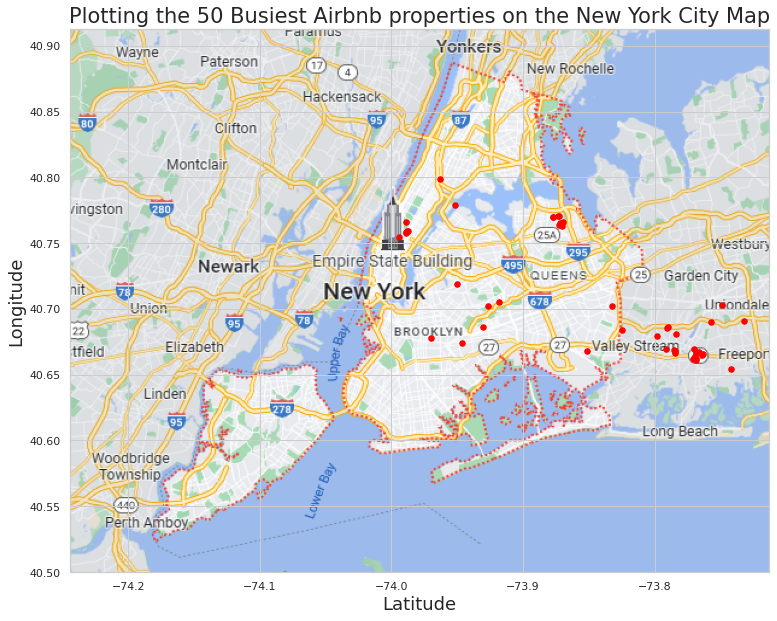

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(Busiest_50_df.longitude, Busiest_50_df.latitude, zorder=1, alpha= 1, c='red', s=30)
ax.set_title('Plotting the 50 Busiest Airbnb properties on the New York City Map', fontsize = 21)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(new_york_city_map, zorder=0, extent = Box, aspect= 'equal')
plt.show()

The above Map shows the top 50 Busiest Airbnb properties in the New York City

# **Plot the top 1000 Airbnb properties that are most visited by people in New York City Map**

In [ ]:
most_visited_map = booking_df.groupby(['name'])['number_of_reviews','latitude','longitude'].sum().sort_values(by = 'number_of_reviews',ascending=False)[:1000]
most_visited_map.rename(columns = {'name' : 'Property Names'}, inplace = True)
most_visited_map.head()

,number_of_reviews,latitude,longitude
name,,,
Private Bedroom in Manhattan,666,163.29544,-295.74942
Room near JFK Queen Bed,629,40.66730,-73.76831
Beautiful Bedroom in Manhattan,617,81.66456,-147.87667
Great Bedroom in Manhattan,607,40.82085,-73.94025
Room Near JFK Twin Beds,576,40.66939,-73.76975


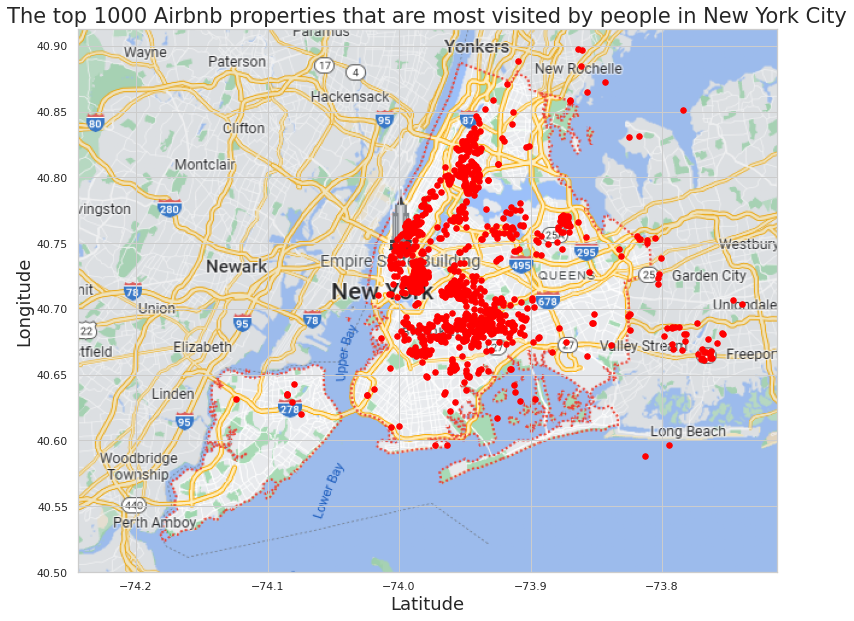

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(most_visited_map.longitude, most_visited_map.latitude, zorder=1, alpha= 1, c='red', s=30)
ax.set_title('The top 1000 Airbnb properties that are most visited by people in New York City', fontsize = 21)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(new_york_city_map, zorder=0, extent = Box, aspect= 'equal')
plt.show()

The above Map shows the top 1000 Airbnb properties that are most visited by people in New York City

# **FINAL CONCLUSION** </br>

Through this data exploration, we uncover the underlying structure of a data set and exposed trends, patterns, and relationships that are not readily apparent.